**Sentiment Analysis of Kampus Mengajar Program Opinions**

Measure the accuracy, precision, and recall rates of the Multinomial Naïve Bayes method on opinions about the Kampus Mengajar program on the Twitter social network

**Memasukan semua modul/library**

In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
! pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.toktok import ToktokTokenizer

pd.set_option("display.max_colwidth", 100)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


# **INPUT DATA**

In [ ]:
df=pd.read_excel("KM.xlsx")

In [ ]:
df.head (800)

,NO,TEXT,SENTIMEN
0,1,Kampus mengajar lama banget anjg nunggu rekom,0
1,2,Belajar Memahami Kolaborasi di Dunia Pendidikan melalui Program Kampus Mengajar https://t.co/KyD...,1
2,3,Daftar kampus mengajar aja #kampusmengajar,1
3,4,Program Kampus Mengajar yang merupakan salah satu program implementasi kebijakan Merdeka Belajar...,1
4,5,@anneasya aku blm keluar ka alesannya karena masih semester 3 jadi blm di izinin padahal di sya...,0
...,...,...,...
795,796,"bbh kampus mengajar kapan cair bang? Lama bgtt! duit gweh dah mau abis ini, butuh ditabok lima M...",0
796,797,"Ngene iki jamanku biyen durung ono kampus mengajar &amp Asistensi mengajar, ono jenenge KKN tig...",0
797,798,"@collegemenfess pernah ikut program mbkm kampus mengajar di SD, disuruh perbaikin sekolah yg tem...",0
798,799,Hai para mutual ku yg baik ~ Aku sama kelompok Kampus Mengajar ku mau ngajak kalian buat berdona...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NO        800 non-null    int64 
 1   TEXT      800 non-null    object
 2   SENTIMEN  800 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.9+ KB


# **Data Beserta Label**

###**Sentimen positif**

In [ ]:
df[df['SENTIMEN'] == 1].head(10)

,NO,TEXT,SENTIMEN
1,2,Belajar Memahami Kolaborasi di Dunia Pendidikan melalui Program Kampus Mengajar https://t.co/KyD...,1
2,3,Daftar kampus mengajar aja #kampusmengajar,1
3,4,Program Kampus Mengajar yang merupakan salah satu program implementasi kebijakan Merdeka Belajar...,1
7,8,barangkali mau tanya2 sm kampus mengajar 1 siniii,1
12,13,Saya Praktisi yg Mengajar di Kampus Bukan Dosen dan bukan Motivator Tujuan saya adalah berbagi i...,1
15,16,cek ig kampus mengajar aja nderr atau bisa ke web mbkm nya langsung detail kok disitu,1
17,18,seng makin membuka mataku nek aku bisa jadi guru iku yo gara gara kampus mengajar iki,1
18,19,KM kaaa Kampus Mengajar,1
19,20,PANGGILAN KEPADA CARAT BAIK ALUMNI MAUPUN YG SEDANG MELAKSANAKAN PROGRAM KAMPUS MENGAJAR UNTUK J...,1
20,21,aku juga mau ikutan aku dari fakultas kesehatan masyarakat atau FKM tapi aku ikut Kampus Mengaja...,1


### **Sentimen negatif**

In [ ]:
df[df['SENTIMEN'] == 0].head(10)

,NO,TEXT,SENTIMEN
0,1,Kampus mengajar lama banget anjg nunggu rekom,0
4,5,@anneasya aku blm keluar ka alesannya karena masih semester 3 jadi blm di izinin padahal di sya...,0
5,6,"guyss kalian yg daftar kampus mengajar 7, surat rekomendasi kalian udah keluar kah punya gua lam...",0
6,7,ness kalian yg daftar Kampus Mengajar udah dapet SPTJM Surat Rekomendasi belum ya? gua belum dap...,0
8,9,ngulang lagi DAHLAH COQQ UDAH KEBURU MALES ANJIRRR,0
9,10,ikut tes ulang kampus mengajar tapi sampai sekarang ga bisa ngerjain soal tes,0
10,11,takut gagal ga lolos ikut kampus mengajar dulunya ga pernah ikut organisasi apapun sama kegiata...,0
11,12,terkendala kampus mengajar,0
13,14,mau ikut program MBKM kayak kampus mengajar tapi takut ditempatkan jauh domisili,0
14,15,ikut kampus mengajar jangan jangan nanti tetep ada jadwal kuliah ngga jadi daftar,0


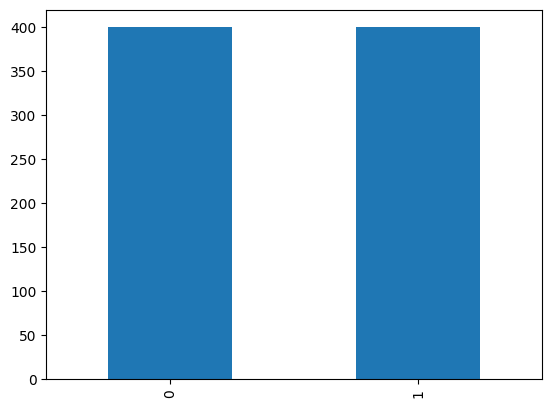

In [ ]:
# Distribusi label pada dataset.
df['SENTIMEN'].value_counts().plot(kind='bar');

**Jumlah data perkelas 1 = Positif dan 0 = Negatif**

In [ ]:
df["SENTIMEN"].value_counts()

0    400
1    400
Name: SENTIMEN, dtype: int64

In [ ]:
df["SENTIMEN"].value_counts(normalize=True)

0    0.5
1    0.5
Name: SENTIMEN, dtype: float64

# **Tahapan Pre-processing**

###  ***CLEANSING***

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

def remove_tweet_special(text):
    # hapus tab, baris baru dll
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # hapus non ASCII (emoticon, dll)
    text = text.encode('ascii', 'replace').decode('ascii')
    # hapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # hapus URL
    return text.replace("http://", " ").replace("https://", " ")

df['TEXT'] = df['TEXT'].apply(remove_tweet_special)

#hapus angka
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['TEXT'] = df['TEXT'].apply(remove_number)

#hapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['TEXT'] = df['TEXT'].apply(remove_punctuation)

#hapus spasi di awal dan akhir teks
def remove_whitespace_LT(text):
    return text.strip()

df['TEXT'] = df['TEXT'].apply(remove_whitespace_LT)

#hapus beberapa spasi menjadi satu spasi
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['TEXT'] = df['TEXT'].apply(remove_whitespace_multiple)

# hapus satu karakter
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['TEXT'] = df['TEXT'].apply(remove_singl_char)
df['thalia_text'] = np.vectorize(remove_pattern)(df['TEXT'], "@[\w]*")
df.head(10)

,NO,TEXT,SENTIMEN,thalia_text
0,1,Kampus mengajar lama banget anjg nunggu rekom,0,Kampus mengajar lama banget anjg nunggu rekom
1,2,Belajar Memahami Kolaborasi di Dunia Pendidikan melalui Program Kampus Mengajar,1,Belajar Memahami Kolaborasi di Dunia Pendidikan melalui Program Kampus Mengajar
2,3,Daftar kampus mengajar aja,1,Daftar kampus mengajar aja
3,4,Program Kampus Mengajar yang merupakan salah satu program implementasi kebijakan Merdeka Belajar...,1,Program Kampus Mengajar yang merupakan salah satu program implementasi kebijakan Merdeka Belajar...
4,5,aku blm keluar ka alesannya karena masih semester jadi blm di izinin padahal di syarat Kampus Me...,0,aku blm keluar ka alesannya karena masih semester jadi blm di izinin padahal di syarat Kampus Me...
5,6,guyss kalian yg daftar kampus mengajar surat rekomendasi kalian udah keluar kah punya gua lama b...,0,guyss kalian yg daftar kampus mengajar surat rekomendasi kalian udah keluar kah punya gua lama b...
6,7,ness kalian yg daftar Kampus Mengajar udah dapet SPTJM Surat Rekomendasi belum ya gua belum dape...,0,ness kalian yg daftar Kampus Mengajar udah dapet SPTJM Surat Rekomendasi belum ya gua belum dape...
7,8,barangkali mau tanya sm kampus mengajar siniii,1,barangkali mau tanya sm kampus mengajar siniii
8,9,ngulang lagi DAHLAH COQQ UDAH KEBURU MALES ANJIRRR,0,ngulang lagi DAHLAH COQQ UDAH KEBURU MALES ANJIRRR
9,10,ikut tes ulang kampus mengajar tapi sampai sekarang ga bisa ngerjain soal tes,0,ikut tes ulang kampus mengajar tapi sampai sekarang ga bisa ngerjain soal tes


In [ ]:
df = df.drop(columns= ['TEXT','NO'])
df.to_csv("clean_text.csv")

###***CASE FOLDING***

In [ ]:
def to_lower(text):
        return text.lower()

In [ ]:
df['thalia_text']=df['thalia_text'].apply(to_lower)
df.head(10)

,SENTIMEN,thalia_text
0,0,kampus mengajar lama banget anjg nunggu rekom
1,1,belajar memahami kolaborasi di dunia pendidikan melalui program kampus mengajar
2,1,daftar kampus mengajar aja
3,1,program kampus mengajar yang merupakan salah satu program implementasi kebijakan merdeka belajar...
4,0,aku blm keluar ka alesannya karena masih semester jadi blm di izinin padahal di syarat kampus me...
5,0,guyss kalian yg daftar kampus mengajar surat rekomendasi kalian udah keluar kah punya gua lama b...
6,0,ness kalian yg daftar kampus mengajar udah dapet sptjm surat rekomendasi belum ya gua belum dape...
7,1,barangkali mau tanya sm kampus mengajar siniii
8,0,ngulang lagi dahlah coqq udah keburu males anjirrr
9,0,ikut tes ulang kampus mengajar tapi sampai sekarang ga bisa ngerjain soal tes


In [ ]:
df.to_csv("casefolding_text.csv")

### ***TOKENIZING***

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
def token(thalia_text):
    nstr = thalia_text.split(' ')
    dat= []
    a = -1
    for hu in nstr:
      a = a + 1
    if hu == '':
      dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr
df['thalia_text'] = df['thalia_text'].apply(token)
df[['thalia_text', 'SENTIMEN']].head(11)

,thalia_text,SENTIMEN
0,"[kampus, mengajar, lama, banget, anjg, nunggu, rekom]",0
1,"[belajar, memahami, kolaborasi, di, dunia, pendidikan, melalui, program, kampus, mengajar]",1
2,"[daftar, kampus, mengajar, aja]",1
3,"[program, kampus, mengajar, yang, merupakan, salah, satu, program, implementasi, kebijakan, merd...",1
4,"[aku, blm, keluar, ka, alesannya, karena, masih, semester, jadi, blm, di, izinin, padahal, di, s...",0
5,"[guyss, kalian, yg, daftar, kampus, mengajar, surat, rekomendasi, kalian, udah, keluar, kah, pun...",0
6,"[ness, kalian, yg, daftar, kampus, mengajar, udah, dapet, sptjm, surat, rekomendasi, belum, ya, ...",0
7,"[barangkali, mau, tanya, sm, kampus, mengajar, siniii]",1
8,"[ngulang, lagi, dahlah, coqq, udah, keburu, males, anjirrr]",0
9,"[ikut, tes, ulang, kampus, mengajar, tapi, sampai, sekarang, ga, bisa, ngerjain, soal, tes]",0


In [ ]:
df.to_csv("Tokenizing.csv")

### ***STOPWORDS REMOVAL***

In [ ]:
# Pastikan kolom 'thalia_text' hanya berisi string
df['thalia_text'] = df['thalia_text'].astype(str)

# Filter elemen yang benar-benar string
df['thalia_text'] = df['thalia_text'].apply(lambda x: ' '.join([w for w in x.split() if isinstance(w, str) and len(w) > 3]))

In [ ]:
#atur stopwords ke indonesia
factory = StopWordRemoverFactory()
stop= factory.get_stop_words()

custom_stopwords = ["ka","ness","guyss","anjg","coqq","njir","bjirr","hai","anjirrr","anjir","aloo","yapssss","hiyaaaaaaah","wkwkwkk","tuh","nder","kaaa","seng","nderr","xixi","yo","join","this","trend","dg","yg","yang","guyss","xixixixi","yapssss","WKWKWKK","um","yg","sm","wkwkwkw","bang","yg","dr","yaaa"]
stop.extend(custom_stopwords)

print(stop)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
tokenizer=ToktokTokenizer()
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Terapkan fungsi pada kolom teks
df['thalia_text']=df['thalia_text'].apply(remove_stopwords)
df.head(10)

,SENTIMEN,thalia_text
0,0,"[ ' kampus ' , ' mengajar ' , ' lama ' , ' banget ' , ' ' , ' nunggu ' , ' rekom ' ]"
1,1,"[ ' belajar ' , ' memahami ' , ' kolaborasi ' , ' ' , ' dunia ' , ' pendidikan ' , ' melalui ' ,..."
2,1,"[ ' daftar ' , ' kampus ' , ' mengajar ' , ' aja ' ]"
3,1,"[ ' program ' , ' kampus ' , ' mengajar ' , ' ' , ' merupakan ' , ' salah ' , ' satu ' , ' progr..."
4,0,"[ ' aku ' , ' blm ' , ' keluar ' , ' ' , ' alesannya ' , ' ' , ' ' , ' semester ' , ' jadi ' , '..."
5,0,"[ ' ' , ' kalian ' , ' yg ' , ' daftar ' , ' kampus ' , ' mengajar ' , ' surat ' , ' rekomendasi..."
6,0,"[ ' ' , ' kalian ' , ' yg ' , ' daftar ' , ' kampus ' , ' mengajar ' , ' udah ' , ' dapet ' , ' ..."
7,1,"[ ' barangkali ' , ' mau ' , ' tanya ' , ' sm ' , ' kampus ' , ' mengajar ' , ' siniii ' ]"
8,0,"[ ' ngulang ' , ' ' , ' dahlah ' , ' ' , ' udah ' , ' keburu ' , ' males ' , ' ' ]"
9,0,"[ ' ikut ' , ' tes ' , ' ulang ' , ' kampus ' , ' mengajar ' , ' ' , ' ' , ' sekarang ' , ' ga '..."


In [ ]:
df.to_csv("stopwordremov_sentimen.csv")

### ***Stemming***

In [ ]:
#Stemming text
factory = StemmerFactory()
ps = factory.create_stemmer()

def simple_stemmer(text):
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
#menerapkan fungsi pada kolom selanjutnya
df['thalia_text']=df['thalia_text'].apply(simple_stemmer)
df.head(800)

,SENTIMEN,thalia_text
0,0,kampus ajar lama banget nunggu rekom
1,1,ajar paham kolaborasi dunia didik lalu program kampus ajar
2,1,daftar kampus ajar aja
3,1,program kampus ajar rupa salah satu program implementasi bijak m...
4,0,aku blm keluar alesannya semester jadi blm izinin padahal ...
...,...,...
795,0,bbh kampus ajar kapan cair bang lama bgtt duit gweh dah mau ...
796,0,ngene iki jaman biyen durung ono kampus ajar amp asistensi ajar ...
797,0,pernah ikut program mbkm kampus ajar sd suruh perbaikin sekolah ...
798,1,mutual ku yg baik aku sama kelompok kampus ajar ku mau ...


In [ ]:
df.to_csv("stemming.csv")

# **Implementasi Metode Multinomial Naive Bayes**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#**Input Data**

In [ ]:
df = pd.read_csv('stemming.csv')
df = df.drop(columns= ['Unnamed: 0'])
df.head(10)

,SENTIMEN,thalia_text
0,0,kampus ajar lama banget nunggu rekom
1,1,ajar paham kolaborasi dunia didik lalu program kampus ajar
2,1,daftar kampus ajar aja
3,1,program kampus ajar rupa salah satu program implementasi bijak m...
4,0,aku blm keluar alesannya semester jadi blm izinin padahal ...
5,0,kalian yg daftar kampus ajar surat rekomendasi kalian udah kelua...
6,0,kalian yg daftar kampus ajar udah dapet sptjm surat rekomendasi ...
7,1,barangkali mau tanya sm kampus ajar siniii
8,0,ngulang dah udah keburu males
9,0,ikut tes ulang kampus ajar sekarang ga ngerjain soal tes


## **TF-IDF**

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
vectors = vectorizer.fit_transform(df.thalia_text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
words_df.head(800)

,aaaaaa,aaamiin,aaarrghhh,aamiin,aamiinnnn,abad,abdi,abis,abrek,absen,...,youtube,yudisium,yuk,yukgenerasi,yupps,zaman,zina,zona,zonauang,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words_df.to_csv("tfidf.csv")

In [ ]:
X = words_df
y = df.SENTIMEN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# **KLASIFIKASI MULTINOMIAL  NAIVE  BAYES**

# ***K-FOLD CROSS VALIDATION***

**K-fold 2 (Jumlah keseluruhan data dibagi menjadi 2 bagian yang sama terdapat data testing dan data training, hingga keseluruhan data pernah menjadi data testing)**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kfold.split(X_vectorized, y)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melakukan prediksi dan peroleh label hasil prediksi
    predicted = clf.fit(X_train, y_train).predict(X_test)

    # Hitung presisi dan recall
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    print(f"Fold {fold + 1} - Testing: {test_index}, Training: {train_index}")

    print("=" * 100)

Fold 1 - Testing: [  0   2   3   6   7   9  10  11  15  18  22  23  24  28  29  30  31  33
  39  41  42  43  44  49  51  54  55  56  60  61  63  65  66  67  68  69
  70  72  73  74  75  76  77  78  79  81  82  83  84  86  88  89  90  92
  93  96  97 101 104 108 109 110 114 116 117 118 120 125 131 132 133 135
 136 137 139 140 144 145 148 153 155 158 163 164 165 167 168 174 176 177
 178 181 182 184 188 192 193 196 198 199 203 204 208 209 210 211 212 213
 215 218 220 221 223 227 228 231 234 235 236 237 238 239 244 247 248 249
 250 254 256 257 259 260 264 265 266 268 271 274 275 277 278 281 284 285
 286 289 290 291 292 294 296 299 300 302 306 307 309 310 311 314 316 318
 319 323 324 326 327 328 329 331 332 333 334 335 336 338 340 342 344 346
 350 351 352 355 356 357 360 361 362 363 365 367 368 369 375 377 380 381
 382 383 388 393 394 395 396 398 404 405 409 411 412 417 420 422 423 424
 425 426 428 431 432 433 434 436 440 442 443 444 445 446 447 448 450 451
 453 456 457 462 464 465 467 473 

**Hasil Akurasi, Presisi, Recall pada K-Fold 2**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Melakukan prediksi dan peroleh label hasil prediksi
predicted = cross_val_predict(clf, X_vectorized, y, cv=kfold)

#Tampilkan hasil
precision_scores = []
recall_scores = []

# Tampilkan hasil
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    clf.fit(X_train, y_train)

    # Prediksi sentimen
    predictions = clf.predict(X_test)

    # Ratakan sentimen aktual dan prediksi
    flat_actual_sentiment = np.ravel(y_test)
    flat_predicted_sentiment = np.ravel(predictions)

    # Hitung confusion matrix
    cm = confusion_matrix(flat_actual_sentiment, flat_predicted_sentiment)

    # Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
    cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    # Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
    tp, fp, fn, tn = cm_formatted.ravel()

    # Hitung dan tampilkan akurasi, presisi, dan recall untuk setiap fold
    fold_accuracy = accuracy_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_precision = precision_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_recall = recall_score(flat_actual_sentiment, flat_predicted_sentiment)

    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)

    print(f"Fold {fold + 1}")

    print(f"Sentimen Aktual: {flat_actual_sentiment}")
    print(f"Sentimen Prediksi: {flat_predicted_sentiment}")

    print(f"Jumlah Sentimen Aktual: {len(flat_actual_sentiment)}")
    print(f"Jumlah Sentimen Prediksi: {len(flat_predicted_sentiment)}")

    print(f"Confusion Matrix:\n {cm_formatted}")

    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")

    print(f"Akurasi Fold {fold + 1}: {fold_accuracy}")
    print(f"Presisi Fold {fold + 1}: {fold_precision}")
    print(f"Recall Fold {fold + 1}: {fold_recall}")

    print("=" * 50)


# Tampilkan hasil akhir
print('Multinomial Naive Bayes\n'.upper())
print(f'Akurasi Rata-rata: {np.mean(cross_val_score(clf, X_vectorized, y, cv=kfold))}')
print(f'Presisi Rata-rata: {np.mean(precision_scores)}')
print(f'Recall Rata-rata: {np.mean(recall_scores)}')

Fold 1
Sentimen Aktual: [0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1]
Sentimen Prediksi: [1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0

**K-fold 4 (Jumlah keseluruhan data dibagi menjadi 4 bagian yang sama terdapat data testing dan data training)**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kfold.split(X_vectorized, y)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melakukan prediksi dan peroleh label hasil prediksi
    predicted = clf.fit(X_train, y_train).predict(X_test)

    # Hitung presisi dan recall
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    print(f"Fold {fold + 1} - Testing: {test_index}, Training: {train_index}")

    print("=" * 100)

Fold 1 - Testing: [  2   7  10  23  29  30  31  33  39  49  54  55  60  63  65  66  67  72
  76  77  78  79  81  84  86  90  96  97 101 109 110 118 120 133 137 139
 148 155 168 174 181 192 196 198 199 204 208 209 210 211 213 215 218 231
 235 244 247 250 254 260 264 265 266 275 281 286 294 296 302 306 309 314
 316 323 326 327 329 333 336 342 346 350 352 357 360 361 365 367 368 377
 381 382 383 388 393 394 395 398 409 422 423 425 428 431 432 436 440 442
 446 456 464 481 483 486 490 506 512 513 515 519 521 525 526 527 529 532
 533 534 537 545 554 568 569 570 576 578 582 586 589 591 594 595 596 603
 604 608 610 615 620 621 622 628 631 635 637 640 641 644 650 652 655 656
 658 659 662 666 667 670 673 688 689 692 696 705 707 713 715 719 720 721
 723 736 738 741 744 746 750 754 758 760 764 776 777 783 786 787 790 795
 796 798], Training: [  0   1   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  32  34  35  36  37  38  40  41  42  43  44
  45  46  47

**Nilai Akurasi, Presisi, Recall pada K-Fold 4**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Melakukan prediksi dan peroleh label hasil prediksi
predicted = cross_val_predict(clf, X_vectorized, y, cv=kfold)

#Tampilkan hasil
precision_scores = []
recall_scores = []

# Tampilkan hasil
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    clf.fit(X_train, y_train)

    # Prediksi sentimen
    predictions = clf.predict(X_test)

    # Ratakan sentimen aktual dan prediksi
    flat_actual_sentiment = np.ravel(y_test)
    flat_predicted_sentiment = np.ravel(predictions)

    # Hitung confusion matrix
    cm = confusion_matrix(flat_actual_sentiment, flat_predicted_sentiment)

    # Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
    cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    # Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
    tp, fp, fn, tn = cm_formatted.ravel()

    # Hitung dan tampilkan akurasi, presisi, dan recall untuk setiap fold
    fold_accuracy = accuracy_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_precision = precision_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_recall = recall_score(flat_actual_sentiment, flat_predicted_sentiment)

    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)

    print(f"Fold {fold + 1}")

    print(f"Sentimen Aktual: {flat_actual_sentiment}")
    print(f"Sentimen Prediksi: {flat_predicted_sentiment}")

    print(f"Jumlah Sentimen Aktual: {len(flat_actual_sentiment)}")
    print(f"Jumlah Sentimen Prediksi: {len(flat_predicted_sentiment)}")

    print(f"Confusion Matrix:\n {cm_formatted}")

    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")

    print(f"Akurasi Fold {fold + 1}: {fold_accuracy}")
    print(f"Presisi Fold {fold + 1}: {fold_precision}")
    print(f"Recall Fold {fold + 1}: {fold_recall}")

    print("=" * 50)


# Tampilkan hasil akhir
print('Multinomial Naive Bayes\n'.upper())
print(f'Akurasi Rata-rata: {np.mean(cross_val_score(clf, X_vectorized, y, cv=kfold))}')
print(f'Presisi Rata-rata: {np.mean(precision_scores)}')
print(f'Recall Rata-rata: {np.mean(recall_scores)}')

Fold 1
Sentimen Aktual: [1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1]
Sentimen Prediksi: [1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1]
Jumlah Sentimen Aktual: 200
Jumlah Sentimen Prediksi: 200
Confusion Matrix:
 [[83 22]
 [18 77]]
True Positive (TP): 83
True Negative (TN): 77
F

**K-fold 5 (Jumlah keseluruhan data dibagi menjadi 5 bagian yang terdapat data testing dan data training)**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kfold.split(X_vectorized, y)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melakukan prediksi dan peroleh label hasil prediksi
    predicted = clf.fit(X_train, y_train).predict(X_test)

    # Hitung presisi dan recall
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    print(f"Fold {fold + 1} - Testing: {test_index}, Training: {train_index}")

    print("=" * 100)

Fold 1 - Testing: [  2   7  10  23  29  30  31  33  39  49  54  63  65  66  67  72  76  77
  78  81  84  86  96  97 101 109 110 118 120 137 139 155 168 174 192 198
 199 204 208 209 210 211 215 218 231 235 244 250 254 260 265 266 275 281
 286 294 296 302 306 314 316 323 326 327 333 336 346 352 357 360 361 365
 367 368 377 383 388 393 395 398 409 422 423 425 428 432 446 456 464 481
 483 486 490 506 512 513 515 519 521 525 526 529 532 533 534 537 545 568
 570 578 589 591 594 595 596 604 608 610 621 622 628 635 637 640 641 644
 652 655 656 658 662 666 667 670 688 692 696 705 715 719 720 721 723 738
 741 744 746 750 754 758 760 764 776 777 783 786 787 795 796 798], Training: [  0   1   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  32  34  35  36  37  38  40  41  42  43  44
  45  46  47  48  50  51  52  53  55  56  57  58  59  60  61  62  64  68
  69  70  71  73  74  75  79  80  82  83  85  87  88  89  90  91  92  93
  94  95  98  99 100 102 103 

**Nilai Akurasi, Presisi, Recall pada K-Fold 5**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Melakukan prediksi dan peroleh label hasil prediksi
predicted = cross_val_predict(clf, X_vectorized, y, cv=kfold)

#Tampilkan hasil
precision_scores = []
recall_scores = []

# Tampilkan hasil
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    clf.fit(X_train, y_train)

    # Prediksi sentimen
    predictions = clf.predict(X_test)

    # Ratakan sentimen aktual dan prediksi
    flat_actual_sentiment = np.ravel(y_test)
    flat_predicted_sentiment = np.ravel(predictions)

    # Hitung confusion matrix
    cm = confusion_matrix(flat_actual_sentiment, flat_predicted_sentiment)

    # Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
    cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    # Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
    tp, fp, fn, tn = cm_formatted.ravel()

    # Hitung dan tampilkan akurasi, presisi, dan recall untuk setiap fold
    fold_accuracy = accuracy_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_precision = precision_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_recall = recall_score(flat_actual_sentiment, flat_predicted_sentiment)

    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)

    print(f"Fold {fold + 1}")

    print(f"Sentimen Aktual: {flat_actual_sentiment}")
    print(f"Sentimen Prediksi: {flat_predicted_sentiment}")

    print(f"Jumlah Sentimen Aktual: {len(flat_actual_sentiment)}")
    print(f"Jumlah Sentimen Prediksi: {len(flat_predicted_sentiment)}")

    print(f"Confusion Matrix:\n {cm_formatted}")

    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")

    print(f"Akurasi Fold {fold + 1}: {fold_accuracy}")
    print(f"Presisi Fold {fold + 1}: {fold_precision}")
    print(f"Recall Fold {fold + 1}: {fold_recall}")

    print("=" * 50)


# Tampilkan hasil akhir
print('Multinomial Naive Bayes\n'.upper())
print(f'Akurasi Rata-rata: {np.mean(cross_val_score(clf, X_vectorized, y, cv=kfold))}')
print(f'Presisi Rata-rata: {np.mean(precision_scores)}')
print(f'Recall Rata-rata: {np.mean(recall_scores)}')

Fold 1
Sentimen Aktual: [1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1]
Sentimen Prediksi: [1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 1]
Jumlah Sentimen Aktual: 160
Jumlah Sentimen Prediksi: 160
Confusion Matrix:
 [[69 16]
 [14 61]]
True Positive (TP): 69
True Negative (TN): 61
False Positive (FP): 16
False Negative (FN): 14
Akurasi Fold 1: 0.8125
Presisi Fold 1: 0.8117647058823529
Recall Fold 1: 0.8313253012048193
Fold 2
Sentimen Aktual:

**K-fold 8 (Jumlah keseluruhan data dibagi menjadi 2 bagian yang terdapat data testing dan data training)**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kfold.split(X_vectorized, y)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melakukan prediksi dan peroleh label hasil prediksi
    predicted = clf.fit(X_train, y_train).predict(X_test)

    # Hitung presisi dan recall
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    print(f"Fold {fold + 1} - Testing: {test_index}, Training: {train_index}")

    print("=" * 100)

Fold 1 - Testing: [ 23  30  31  33  39  49  54  63  65  66  67  72  77  78  86  96 109 137
 139 168 174 192 198 199 215 231 244 250 260 265 275 281 286 294 306 323
 327 333 336 346 357 360 361 365 368 377 383 393 395 398 422 423 428 446
 456 481 486 490 512 525 526 529 533 534 545 568 570 578 594 595 596 604
 608 610 621 622 628 635 637 641 655 658 666 667 692 696 705 715 721 723
 741 746 750 754 760 783 786 787 795 796], Training: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  32  34  35  36  37  38  40
  41  42  43  44  45  46  47  48  50  51  52  53  55  56  57  58  59  60
  61  62  64  68  69  70  71  73  74  75  76  79  80  81  82  83  84  85
  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102 103 104 105
 106 107 108 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 138 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 

**Nilai Akurasi, Presisi, Recall pada K-Fold 8**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Melakukan prediksi dan peroleh label hasil prediksi
predicted = cross_val_predict(clf, X_vectorized, y, cv=kfold)

#Tampilkan hasil
precision_scores = []
recall_scores = []

# Tampilkan hasil
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    clf.fit(X_train, y_train)

    # Prediksi sentimen
    predictions = clf.predict(X_test)

    # Ratakan sentimen aktual dan prediksi
    flat_actual_sentiment = np.ravel(y_test)
    flat_predicted_sentiment = np.ravel(predictions)

    # Hitung confusion matrix
    cm = confusion_matrix(flat_actual_sentiment, flat_predicted_sentiment)

    # Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
    cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    # Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
    tp, fp, fn, tn = cm_formatted.ravel()

    # Hitung dan tampilkan akurasi, presisi, dan recall untuk setiap fold
    fold_accuracy = accuracy_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_precision = precision_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_recall = recall_score(flat_actual_sentiment, flat_predicted_sentiment)

    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)

    print(f"Fold {fold + 1}")

    print(f"Sentimen Aktual: {flat_actual_sentiment}")
    print(f"Sentimen Prediksi: {flat_predicted_sentiment}")

    print(f"Jumlah Sentimen Aktual: {len(flat_actual_sentiment)}")
    print(f"Jumlah Sentimen Prediksi: {len(flat_predicted_sentiment)}")

    print(f"Confusion Matrix:\n {cm_formatted}")

    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")

    print(f"Akurasi Fold {fold + 1}: {fold_accuracy}")
    print(f"Presisi Fold {fold + 1}: {fold_precision}")
    print(f"Recall Fold {fold + 1}: {fold_recall}")

    print("=" * 50)


# Tampilkan hasil akhir
print('Multinomial Naive Bayes\n'.upper())
print(f'Akurasi Rata-rata: {np.mean(cross_val_score(clf, X_vectorized, y, cv=kfold))}')
print(f'Presisi Rata-rata: {np.mean(precision_scores)}')
print(f'Recall Rata-rata: {np.mean(recall_scores)}')

Fold 1
Sentimen Aktual: [0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
Sentimen Prediksi: [1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
Jumlah Sentimen Aktual: 100
Jumlah Sentimen Prediksi: 100
Confusion Matrix:
 [[38  8]
 [10 44]]
True Positive (TP): 38
True Negative (TN): 44
False Positive (FP): 8
False Negative (FN): 10
Akurasi Fold 1: 0.82
Presisi Fold 1: 0.8260869565217391
Recall Fold 1: 0.7916666666666666
Fold 2
Sentimen Aktual: [1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1]
Sentimen Prediksi: [1 1 0 0 1 1 0 0 1 0 0 

**K-Fold 10 (Jumlah keseluruhan data dibagi menjadi 10 bagian yang sama, terdapat 1 kolom data testing dan 9 sisanya sebagai data training)**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kfold.split(X_vectorized, y)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melakukan prediksi dan peroleh label hasil prediksi
    predicted = clf.fit(X_train, y_train).predict(X_test)

    # Hitung presisi dan recall
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    print(f"Fold {fold + 1} - Testing: {test_index}, Training: {train_index}")

    print("=" * 100)

Fold 1 - Testing: [ 23  30  31  33  39  49  63  65  66  67  78  86 109 139 168 174 192 198
 199 215 231 244 250 260 265 286 294 306 323 327 333 336 346 357 360 365
 368 377 383 395 398 422 423 446 456 481 486 490 525 526 529 533 534 545
 568 570 578 594 595 596 604 610 621 622 635 637 655 658 666 667 692 696
 721 723 741 746 760 787 795 796], Training: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  32  34  35  36  37  38  40
  41  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  64  68  69  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 169 170 171 172 173 

**Nilai Akurasi, Presisi, Recall pada K-Fold 10**

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# Gantilah definisi variabel X_train, y_train, X, dan y dengan data Anda
X = df.thalia_text
y = df.SENTIMEN

# Inisialisasi objek KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mnb = MultinomialNB()
clf = OneVsRestClassifier(mnb)

# Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Melakukan prediksi dan peroleh label hasil prediksi
predicted = cross_val_predict(clf, X_vectorized, y, cv=kfold)

#Tampilkan hasil
precision_scores = []
recall_scores = []

# Tampilkan hasil
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X_vectorized[train_index], X_vectorized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    clf.fit(X_train, y_train)

    # Prediksi sentimen
    predictions = clf.predict(X_test)

    # Ratakan sentimen aktual dan prediksi
    flat_actual_sentiment = np.ravel(y_test)
    flat_predicted_sentiment = np.ravel(predictions)

    # Hitung confusion matrix
    cm = confusion_matrix(flat_actual_sentiment, flat_predicted_sentiment)

    # Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
    cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    # Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
    tp, fp, fn, tn = cm_formatted.ravel()

    # Hitung dan tampilkan akurasi, presisi, dan recall untuk setiap fold
    fold_accuracy = accuracy_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_precision = precision_score(flat_actual_sentiment, flat_predicted_sentiment)
    fold_recall = recall_score(flat_actual_sentiment, flat_predicted_sentiment)

    precision_scores.append(fold_precision)
    recall_scores.append(fold_recall)

    print(f"Fold {fold + 1}")

    print(f"Sentimen Aktual: {flat_actual_sentiment}")
    print(f"Sentimen Prediksi: {flat_predicted_sentiment}")

    print(f"Jumlah Sentimen Aktual: {len(flat_actual_sentiment)}")
    print(f"Jumlah Sentimen Prediksi: {len(flat_predicted_sentiment)}")

    print(f"Confusion Matrix:\n {cm_formatted}")

    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")

    print(f"Akurasi Fold {fold + 1}: {fold_accuracy}")
    print(f"Presisi Fold {fold + 1}: {fold_precision}")
    print(f"Recall Fold {fold + 1}: {fold_recall}")

    print("=" * 50)


# Tampilkan hasil akhir
print('Multinomial Naive Bayes\n'.upper())
print(f'Akurasi Rata-rata: {np.mean(cross_val_score(clf, X_vectorized, y, cv=kfold))}')
print(f'Presisi Rata-rata: {np.mean(precision_scores)}')
print(f'Recall Rata-rata: {np.mean(recall_scores)}')

Fold 1
Sentimen Aktual: [0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0]
Sentimen Prediksi: [1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0]
Jumlah Sentimen Aktual: 80
Jumlah Sentimen Prediksi: 80
Confusion Matrix:
 [[33  7]
 [ 4 36]]
True Positive (TP): 33
True Negative (TN): 36
False Positive (FP): 7
False Negative (FN): 4
Akurasi Fold 1: 0.8625
Presisi Fold 1: 0.825
Recall Fold 1: 0.8918918918918919
Fold 2
Sentimen Aktual: [1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1
 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 1]
Sentimen Prediksi: [1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 0 0 0 

**Menampilkan Keseluruhan Data (800) (Nilai aktual dan prediksi, confusion matrix, akurasi presisi recall)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

# Data contoh (gantilah dengan data dan label sentimen yang sesuai)
data = df.thalia_text
labels = df.SENTIMEN

# Jumlah fold
k_fold = 10

# Inisialisasi objek KFold
kf = KFold(n_splits=k_fold)

# Inisialisasi variabel untuk menyimpan hasil keseluruhan
all_actual = []
all_predicted = []

# Iterasi melalui setiap fold
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    X_train, X_test = [data.iloc[i] for i in train_index], [data.iloc[i] for i in test_index]
    y_train, y_test = [labels.iloc[i] for i in train_index], [labels.iloc[i] for i in test_index]

    # Gunakan CountVectorizer untuk mengonversi teks menjadi vektor fitur
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Gunakan model klasifikasi (contoh: Multinomial Naive Bayes)
    classifier = MultinomialNB()
    classifier.fit(X_train_vectorized, y_train)

    # Prediksi sentimen untuk data pengujian
    predictions = classifier.predict(X_test_vectorized)

    # Tambahkan hasil lipatan ke variabel keseluruhan
    all_actual.extend(y_test)
    all_predicted.extend(predictions)

# Tampilkan nilai aktual dan prediksi untuk keseluruhan data
print("Nilai Aktual:", all_actual)
print("Nilai Prediksi:", all_predicted)

# Hitung confusion matrix
cm = confusion_matrix(all_actual, all_predicted)

# Ubah urutan elemen agar sesuai dengan format [[TP, FP], [FN, TN]]
cm_formatted = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

# Hitung TP, TN, FP, FN dari confusion matrix yang sudah diubah
tp, fp, fn, tn = cm_formatted.ravel()

# Tampilkan True Positif, True Negatif, False Positif, dan False Negatif
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

# Tampilkan confusion matrix yang sudah diubah
print("Confusion Matrix:")
print(cm_formatted)

# Kalkulasi dan tampilkan akurasi, presisi, dan recall untuk keseluruhan data
accuracy = accuracy_score(all_actual, all_predicted)
precision = precision_score(all_actual, all_predicted)
recall = recall_score(all_actual, all_predicted)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)

Nilai Aktual: [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1